In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from src.consts import data_path
from src.eda import calculate_vif
from src.eda import create_feature

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
plt.rcParams["font.family"] = "Meiryo UI"

## データ読み込み

In [2]:
data = pd.read_csv(os.path.join(data_path, "setagaya_propetry_deel_data_2005_2023.csv"))

data = data[data["total_price"] < 5e9].reset_index(drop=True)
dataset = create_feature(data)

X = dataset
y = np.log(data["total_price"])
dataset.head()

dummy Index(['line', 'area'], dtype='object')


is_only_land  is_closed_price  is_commercial_area  building_age  land_size  \
0     -0.803622         4.435512            -0.24292      0.312201  -0.350694   
1     -0.803622         4.435512            -0.24292      0.726620  -0.408875   
2     -0.803622         4.435512            -0.24292      0.312201  -0.176153   
3     -0.803622         4.435512            -0.24292      1.058155  -0.379784   
4     -0.803622         4.435512            -0.24292      0.892387  -0.350694   

   building_size  is_bag_fabric  is_irregular_shape  is_steel     is_rc  \
0      -0.507257      -0.221177           -0.384209 -0.234705 -0.278579   
1      -0.372741      -0.221177           -0.384209 -0.234705 -0.278579   
2      -0.339112      -0.221177           -0.384209 -0.234705 -0.278579   
3      -0.406370      -0.221177           -0.384209 -0.234705 -0.278579   
4      -0.439999      -0.221177           -0.384209 -0.234705 -0.278579   

    is_wood  is_block  is_used_for_store  is_used_for_office  \
0  1.059851 -0.026512          -0.163344           -0.132415   
1  1.059851 -0.026512          -0.163344           -0.132415   
2  1.059851 -0.026512          -0.163344           -0.132415   
3  1.059851 -0.026512          -0.163344           -0.132415   
4  1.059851 -0.026512          -0.163344           -0.132415   

   is_used_for_factory  is_only_residential_area  is_residential_area  \
0            -0.030617                  0.451404            -0.330325   
1            -0.030617                  0.451404            -0.330325   
2            -0.030617                  0.451404            -0.330325   
3            -0.030617                  0.451404            -0.330325   
4            -0.030617                  0.451404            -0.330325   

   is_purpose_for_living  is_no_front_road  is_front_of_large_road  \
0                    0.0         -0.084947               -0.187861   
1                    0.0         -0.084947               -0.187861   
2                    0.0         -0.084947               -0.187861   
3                    0.0         -0.084947               -0.187861   
4                    0.0         -0.084947               -0.187861   

   is_dealing_as_competition     term  coverage_ratio  floor_area_ratio  \
0                  -0.075486  1.20596       -0.689520          0.105521   
1                  -0.075486  1.20596        0.454618          0.726903   
2                  -0.075486  1.20596       -0.689520         -0.826552   
3                  -0.075486  1.20596        0.454618          0.105521   
4                  -0.075486  1.20596        0.454618          0.726903   

   front_load_width  price_per_square         x         y  line_京王井の頭線  \
0          0.000340         -0.717512 -0.428219 -1.415309    -0.252083   
1          0.666212         -0.717512 -0.256341  1.212177    -0.252083   
2         -0.163774         -0.717512 -1.399209  1.223507    -0.252083   
3         -0.440436         -0.717512 -1.399209  1.223507    -0.252083   
4          0.029890         -0.717512  0.028331 -1.407364    -0.252083   

   line_京王線  line_小田急小田原線  line_東急世田谷線  line_東急多摩川線  line_東急大井町線  line_東急東横線  \
0 -0.495518     -0.623343    -0.338547    -0.020533     2.518205   -0.194959   
1  2.018089     -0.623343    -0.338547    -0.020533    -0.397108   -0.194959   
2  2.018089     -0.623343    -0.338547    -0.020533    -0.397108   -0.194959   
3  2.018089     -0.623343    -0.338547    -0.020533    -0.397108   -0.194959   
4 -0.495518     -0.623343    -0.338547    -0.020533     2.518205   -0.194959   

   line_東急池上線  line_東急田園都市線  line_東急目黒線  area_三軒茶屋  area_上北沢  area_上用賀  \
0   -0.113158     -0.411532   -0.174346  -0.095746 -0.138334 -0.125279   
1   -0.113158     -0.411532   -0.174346  -0.095746 -0.138334 -0.125279   
2   -0.113158     -0.411532   -0.174346  -0.095746 -0.138334 -0.125279   
3   -0.113158     -0.411532   -0.174346  -0.095746 -0.138334 -0.125279   
4   -0.113158     -0.411532   -0.174346  -0.095746 -0.138334 -0.125279   

## EDA

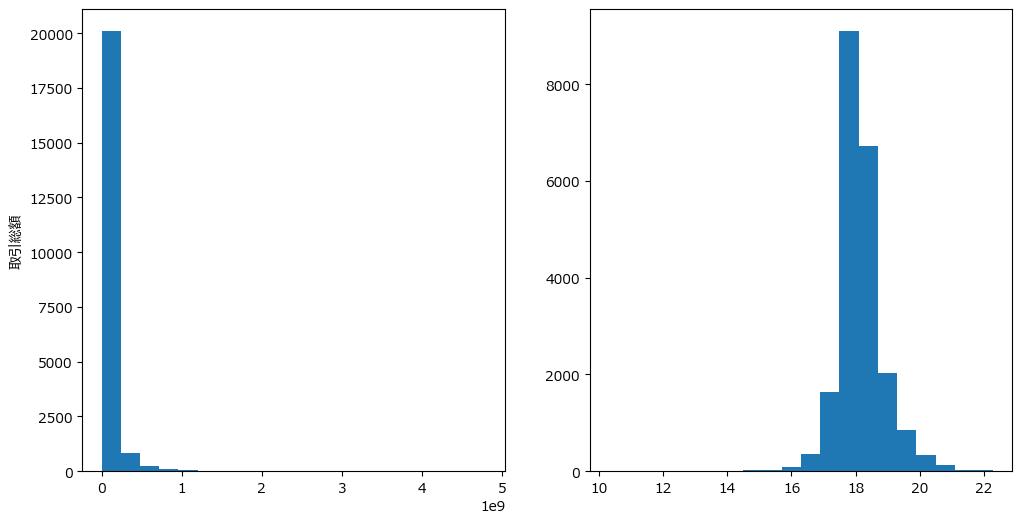

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = ax
ax1.hist(data["total_price"].astype(int), bins=20)
ax2.hist(np.log(data["total_price"].astype(int)), bins=20)
ax1.set_ylabel("取引総額")
plt.show()
fig.savefig("images/total_price_hist.png")

In [4]:
sns.pairplot(data)

price_perはどちらか一つで十分

面責の大きさ同士は相関あり

他はあまり相関がなさそう

/var/folders/fg/t7998_m16wn5r7_hxqchgqyr0000gn/T/ipykernel_71708/3598521242.py:1: UserWarning: Instantiating Int64Dtype without any arguments.Pass a Int64Dtype instance to silence this warning.
  num_cols = data.select_dtypes(include=[float, int, pd.Int64Dtype, bool]).columns


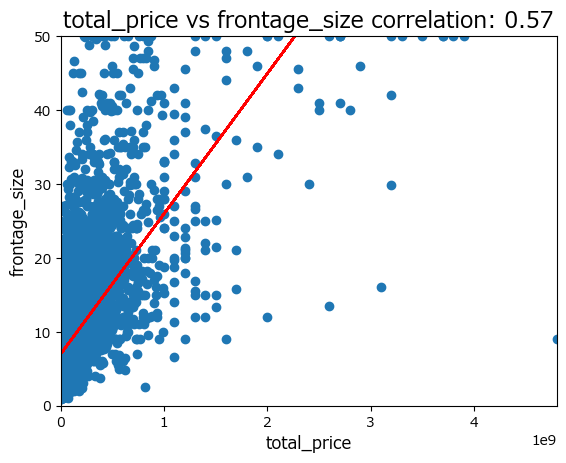

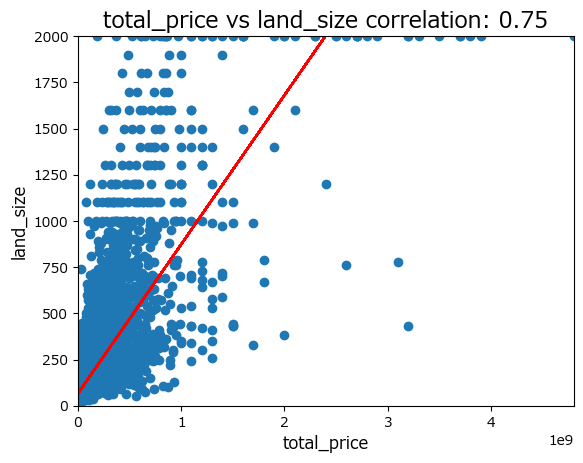

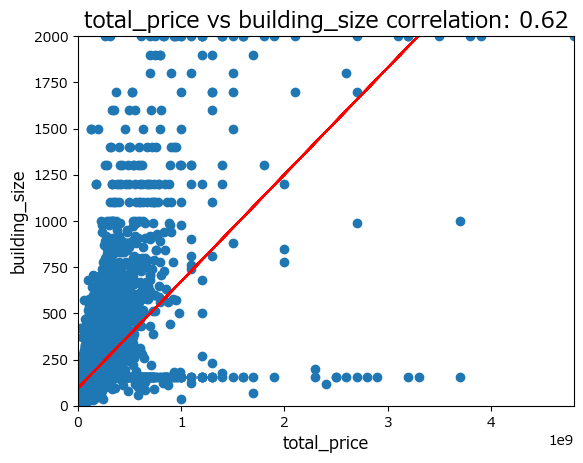

In [5]:
num_cols = data.select_dtypes(include=[float, int, pd.Int64Dtype, bool]).columns
corr_matrix = data[num_cols].corr().abs()

# Find pairs with correlation greater than 0.5
threshold = 0.4
high_corr_pairs = np.where(corr_matrix > threshold)

# Plot scatter plots for these pairs
for i, j in zip(*high_corr_pairs):
    if i == 0:
        if i != j and i < j:  # to avoid self-pairing and duplicate pairs
            fig = plt.figure()
            x_scatter = data[num_cols].iloc[:, i]
            y_scatter = data[num_cols].iloc[:, j]
            m, b = np.polyfit(x_scatter, y_scatter, 1)

            # add linear regression line to scatterplot
            plt.scatter(
                x_scatter,
                y_scatter,
            )
            plt.plot(x_scatter, m * x_scatter + b, color="red")
            plt.xlabel(data[num_cols].columns[i], fontsize=12)
            plt.ylabel(data[num_cols].columns[j], fontsize=12)
            plt.xlim(0, x_scatter.max())
            plt.ylim(0, y_scatter.max())
            plt.title(f"{data[num_cols].columns[i]} vs {data[num_cols].columns[j]} correlation: {corr_matrix.iloc[i, j]:.2f}", fontsize=16)
            plt.show()
            fig.savefig(f"images/scatter_{data[num_cols].columns[i]}_vs_{data[num_cols].columns[j]}.png")

In [6]:
# num_cols = X.select_dtypes(include=[float, int, pd.Int64Dtype, bool]).columns
# calculate_vif(X[num_cols].fillna(0).copy())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, shuffle=True)
# X_test, X_test, y_test, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## 回帰モデル

In [8]:
import statsmodels.api as sm

LinearRegression_model = sm.OLS(y_train, sm.add_constant(X_train, has_constant="add")).fit()
print(LinearRegression_model.summary())

omega_tilde = np.abs(LinearRegression_model.params)[1:]

                            OLS Regression Results                            
Dep. Variable:            total_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        02:06:52   Log-Likelihood:                -1830.9
No. Observations:                4271   AIC:                             3886.
Df Residuals:                    4159   BIC:                             4598.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [9]:
y_pred = LinearRegression_model.predict(sm.add_constant(X_test, has_constant="add"))
print("RMSE: ", np.sqrt(np.mean((np.exp(y_test) - np.exp(y_pred)) ** 2)))
print("MAE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred))))
print("MAPE: ", np.mean(np.abs(np.exp(y_test)- np.exp(y_pred))/ np.exp(y_test)) * 100)

RMSE:  360816377.1238092
MAE:  43678384.095314935
MAPE:  30.223422744924168


<Axes: >

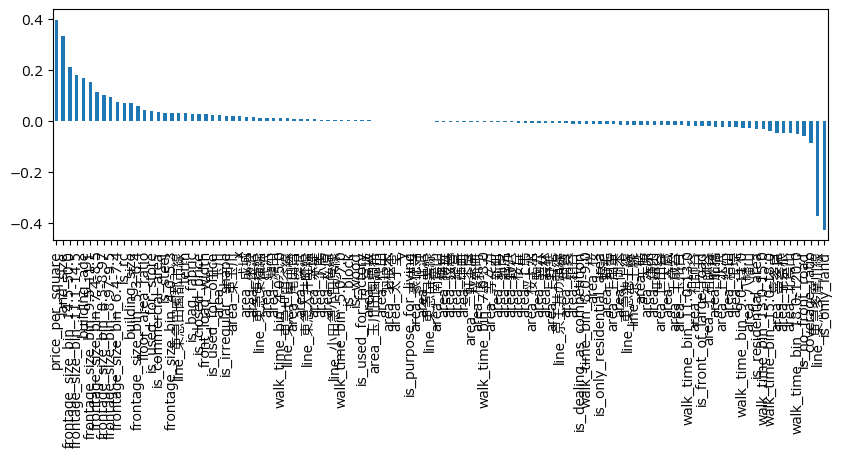

In [10]:
pd.Series(LinearRegression_model.params, index=X.columns).sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10, 3),
)

In [11]:
y_pred = LinearRegression_model.predict(sm.add_constant(X_test))
print("RMSE: ", np.sqrt(np.mean((np.exp(y_test) - np.exp(y_pred)) ** 2)))
print("MAE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred))))
print("MAPE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 100)

RMSE:  360816377.1238092
MAE:  43678384.095314935
MAPE:  30.223422744924168


## Lasso

In [12]:
# 等価なLASSO最適化問題として解く
from sklearn.linear_model import LassoCV

from src.eda import score

# 訓練データの置き換え
X_train_prime = X_train / omega_tilde

# 検証データの置き換え
X_testation_prime = X_test / omega_tilde

aLassoCV = LassoCV(n_alphas=200, cv=8, n_jobs=-1)
aLassoCV.fit(X_train_prime, y_train)
best_alpha = aLassoCV.alpha_

stats_alasso = sm.OLS(y_train, sm.add_constant(X_train_prime, has_constant="add")).fit_regularized(
    alpha=best_alpha, L1_wt=1
)

In [13]:
stats_alasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Results                                  
==============================================================================
Dep. Variable:            total_price   Log-Likelihood:                -2334.9
Model:                            OLS   AIC:                             4448.
Method:            Maximum Likelihood   BIC:                             5598.
Date:                Fri, 31 May 2024                                         
Time:                        02:07:03                                         
No. Observations:                4271                                         
Df Residuals:                    4159                                         
Df Model:                         111                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          18.0688        nan        nan        nan         nan         nan
is_only_land                         0        nan        nan        nan         nan         nan
is_closed_price                 0.0002        nan        nan        nan         nan         nan
is_commercial_area              0.0016        nan        nan        nan         nan         nan
building_age                    0.0230        nan        nan        nan         nan         nan
land_size                       0.1023        nan        nan        nan         nan         nan
building_size                   0.0063        nan        nan        nan         nan         nan
is_bag_fabric                  -0.0008        nan        nan        nan         nan         nan
is_irregular_shape             -0.0007        nan        nan        nan         nan         nan
is_steel                        0.0026        nan        nan        nan         nan         nan
is_rc                           0.0071        nan        nan        nan         nan         nan
is_wood                         0.0003        nan        nan        nan         nan         nan
is_block                     1.375e-05        nan        nan        nan         nan         nan
is_used_for_store               0.0011        nan        nan        nan         nan         nan
is_used_for_office              0.0005        nan        nan        nan         nan         nan
is_used_for_factory         -2.815e-06        nan        nan        nan         nan         nan
is_only_residential_area        0.0002        nan        nan        nan         nan         nan
is_residential_area                  0        nan        nan        nan         nan         nan
is_purpose_for_living                0        nan        nan        nan         nan         nan
is_no_front_road               -0.0041        nan        nan        nan         nan         nan
is_front_of_large_road         -0.0004        nan        nan        nan         nan         nan
is_dealing_as_competition   -8.978e-05        nan        nan        nan         nan         nan
term                            0.0018        nan        nan        nan         nan         nan
coverage_ratio                 -0.0018        nan        nan        nan         nan         nan
floor_area_ratio                0.0003        nan        nan        nan         nan         nan
front_load_width                0.0011        nan        nan        nan         nan         nan
price_per_square                0.0148        nan        nan        nan         nan         nan
x                               0.0017        nan        nan        nan         nan         nan
y                           -6.326e-05        nan        nan        nan         nan         nan
line_京王井の頭線                   3.41e-05        nan        nan        nan         nan       

MAE	: 52888236.662721105
RMSE	: 166688622.9380447
CORR	: 0.7785073392287641
R2	: 0.07216615165165097
MAPE	: 29.735165907615624%


/Users/yuhiaoki/hit/development_of_statistical_analysis/src/eda.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


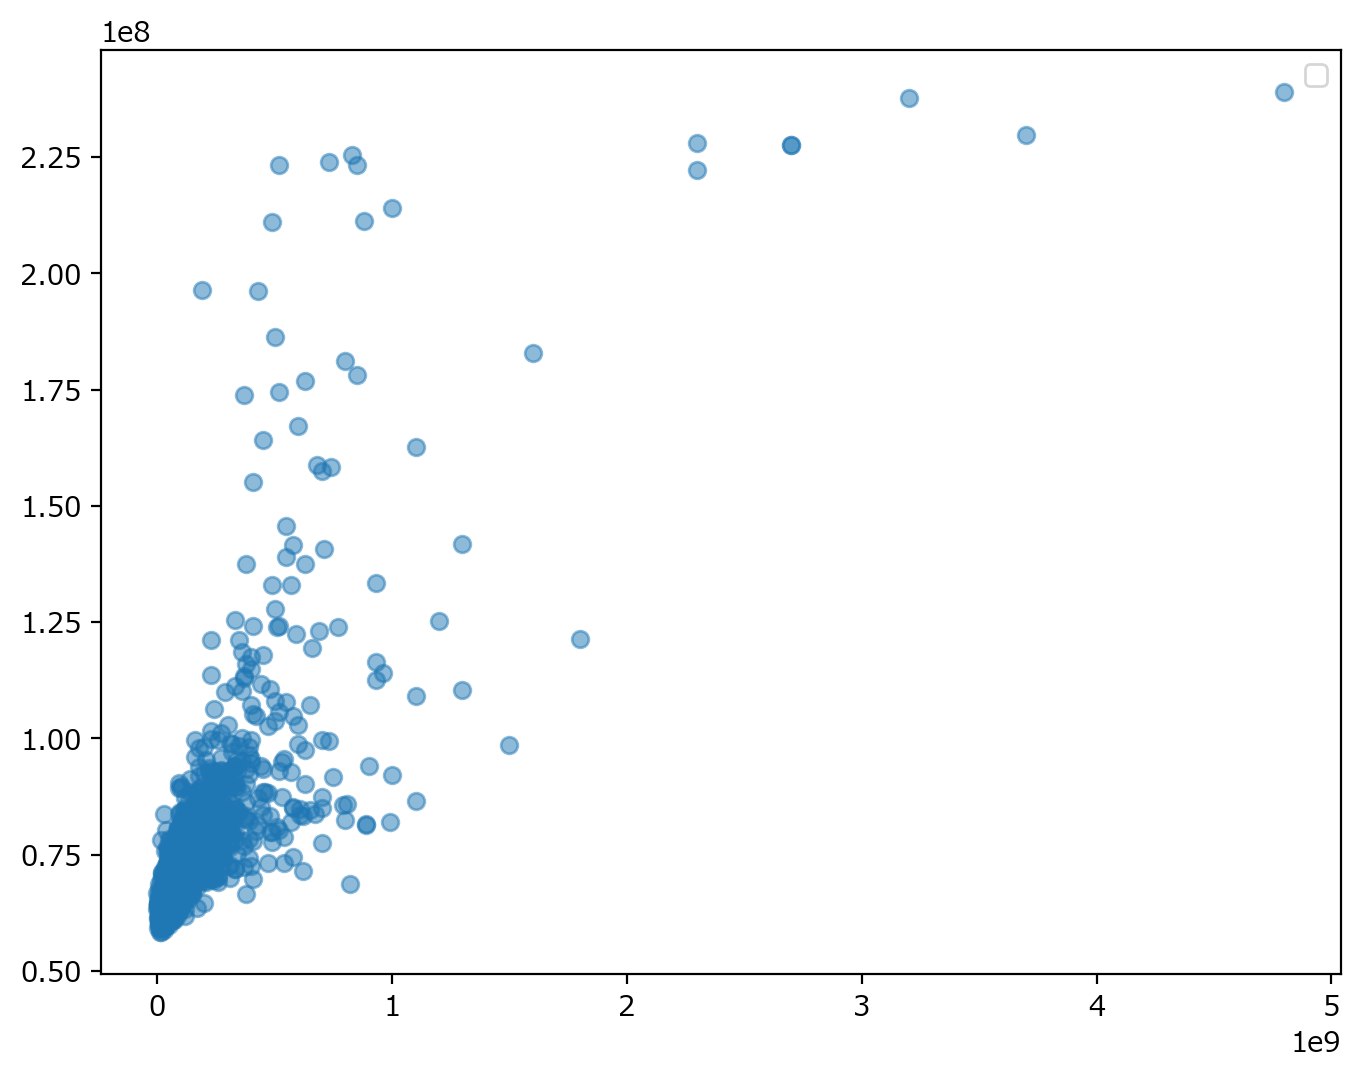

MAE	: 51018184.82069481
RMSE	: 150242073.19270095
CORR	: 0.8012645694951909
R2	: 0.07170227081063074
MAPE	: 29.742682178715512%


/Users/yuhiaoki/hit/development_of_statistical_analysis/src/eda.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


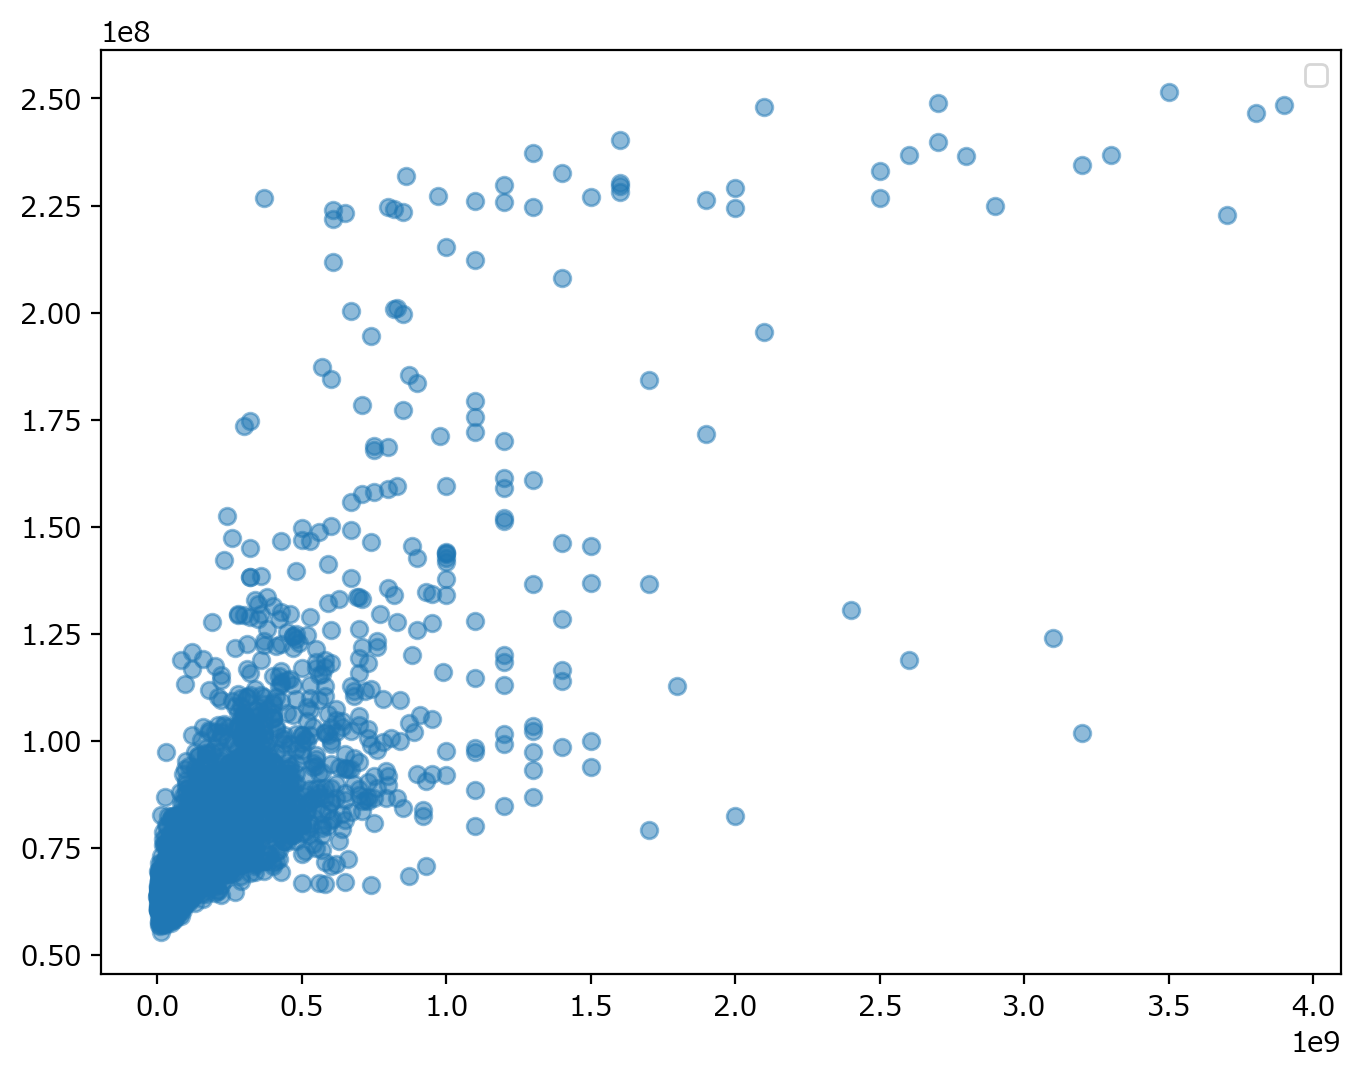

In [14]:
score(np.exp(y_train), np.exp(stats_alasso.predict(sm.add_constant(X_train, has_constant="add"))))
score_AL = score(np.exp(y_test), np.exp(stats_alasso.predict(sm.add_constant(X_test, has_constant="add"))))

In [15]:
target_col = stats_alasso.params[1:][stats_alasso.params[1:].abs() > 0].index
print(target_col)
post_lasso = sm.OLS(y_train, sm.add_constant(X_train[target_col], has_constant="add")).fit()
print(post_lasso.summary())

y_pred = post_lasso.predict(sm.add_constant(X_test[target_col], has_constant="add"))
print("RMSE: ", np.sqrt(np.mean((np.exp(y_test) - np.exp(y_pred)) ** 2)))
print("MAE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred))))
print("MAPE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 100)

Index(['is_closed_price', 'is_commercial_area', 'building_age', 'land_size',
       'building_size', 'is_bag_fabric', 'is_irregular_shape', 'is_steel',
       'is_rc', 'is_wood', 'is_block', 'is_used_for_store',
       'is_used_for_office', 'is_used_for_factory', 'is_only_residential_area',
       'is_no_front_road', 'is_front_of_large_road',
       'is_dealing_as_competition', 'term', 'coverage_ratio',
       'floor_area_ratio', 'front_load_width', 'price_per_square', 'x', 'y',
       'line_京王井の頭線', 'line_小田急小田原線', 'line_東急大井町線', 'line_東急東横線',
       'line_東急池上線', 'line_東急田園都市線', 'line_東急目黒線', 'area_三軒茶屋', 'area_上祖師谷',
       'area_上野毛', 'area_下馬', 'area_世田谷', 'area_中町', 'area_代沢', 'area_代田',
       'area_八幡山', 'area_北沢', 'area_北烏山', 'area_千歳台', 'area_南烏山', 'area_喜多見',
       'area_大原', 'area_大蔵', 'area_奥沢', 'area_宇奈根', 'area_宮坂', 'area_尾山台',
       'area_岡本', 'area_弦巻', 'area_成城', 'area_新町', 'area_松原', 'area_桜',
       'area_桜丘', 'area_桜新町', 'area_梅丘', 'area_池尻', 'area_深沢', 'area_瀬田'

In [23]:
save_params = stats_alasso.params.sort_values(ascending=False).apply(lambda x: round(x, 3))
save_params[save_params.abs() > 0].to_csv("data/lasso_params.csv", sep="&", header=False)

is_only_land                   0.000000e+00
is_closed_price                1.911729e-04
is_commercial_area             1.567126e-03
building_age                   2.304033e-02
land_size                      1.022693e-01
building_size                  6.288890e-03
is_bag_fabric                 -8.169520e-04
is_irregular_shape            -7.309904e-04
is_steel                       2.598774e-03
is_rc                          7.131816e-03
is_wood                        3.188804e-04
is_block                       1.375425e-05
is_used_for_store              1.122306e-03
is_used_for_office             4.622386e-04
is_used_for_factory           -2.815310e-06
is_only_residential_area       1.963047e-04
is_residential_area            0.000000e+00
is_purpose_for_living          0.000000e+00
is_no_front_road              -4.112949e-03
is_front_of_large_road        -4.421124e-04
is_dealing_as_competition     -8.977894e-05
term                           1.830287e-03
coverage_ratio                -1

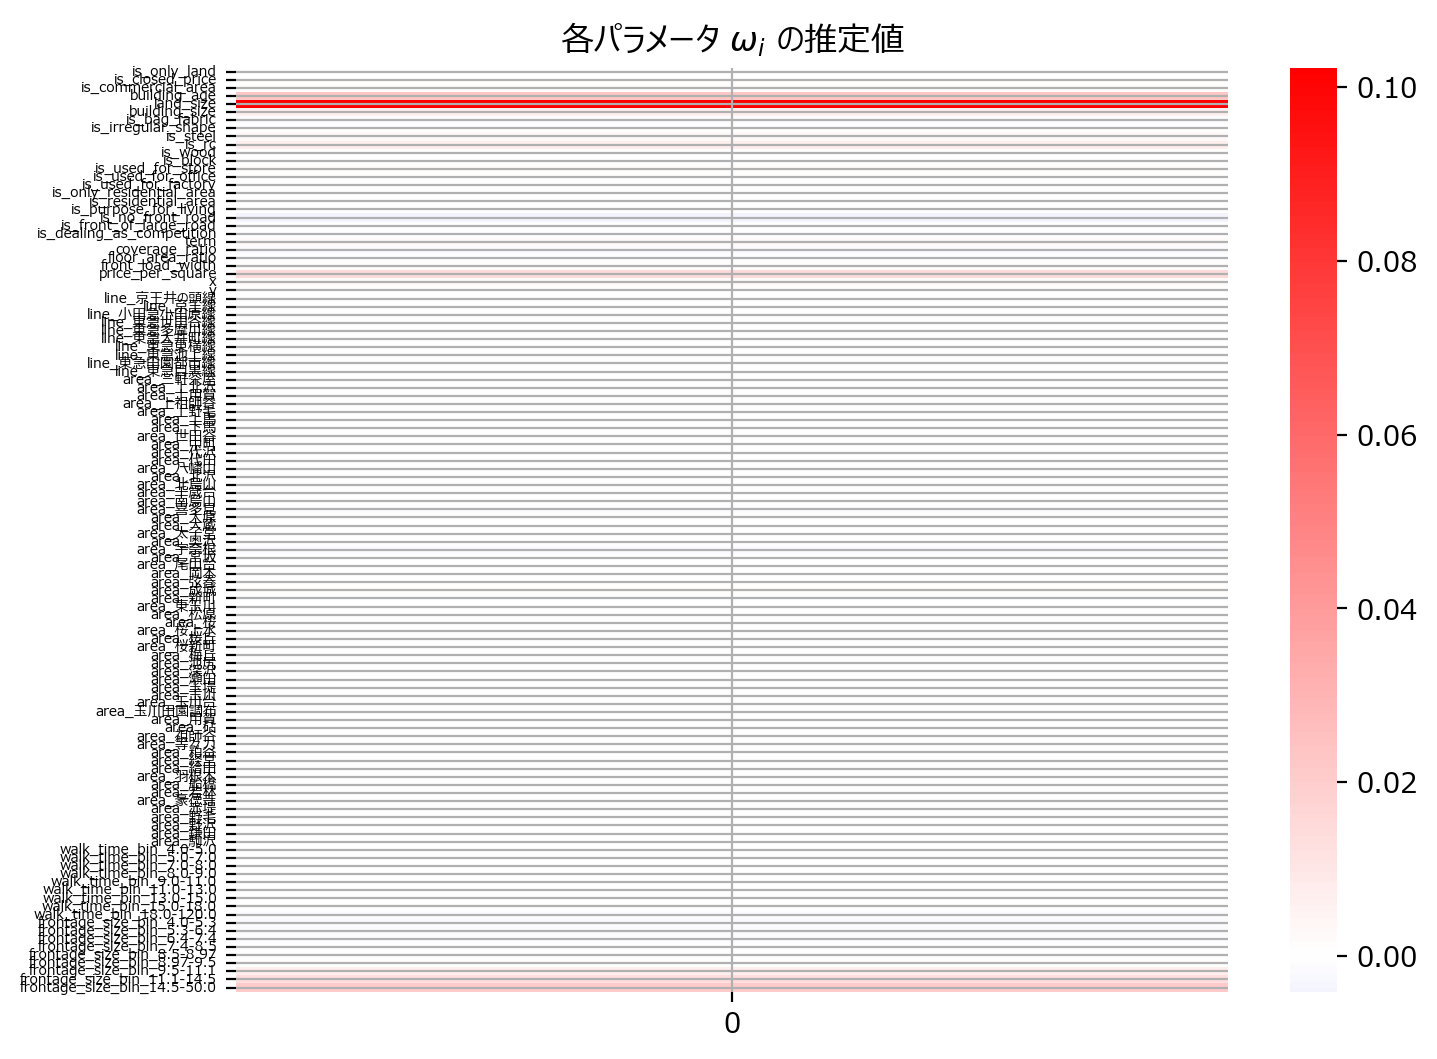

In [17]:
from src.eda import heatmap

heatmap(stats_alasso.params.values[1:], X_test)

In [18]:
import optuna.integration.lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
}

gbm = lgb.train(params, train_data, valid_sets=valid_data, num_boost_round=300)

y_pred = gbm.predict(X_test)
print("RMSE: ", np.sqrt(np.mean((np.exp(y_test) - np.exp(y_pred)) ** 2)))
print("MAE: ", np.mean(np.abs(np.exp(y_test) - np.exp(y_pred))))
print("MAPE: ", np.mean(np.abs((np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test))) * 100)

/Users/yuhiaoki/Library/Caches/pypoetry/virtualenvs/development-of-statistical-analysis-gticaBNH-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-31 02:07:04,717] A new study created in memory with name: no-name-6d6c4e25-1414-4b05-9b3f-8dfb15adfa87
min_child_samples, val_score: 0.217923: 100%|##########| 5/5 [00:04<00:00,  1.06it/s]

RMSE:  61995995.578607894
MAE:  16544184.002295308
MAPE:  14.516595885275537
